In [1]:
import pandas as pd
import numpy as np
import pysam
import os
import pickle
import configparser

from scipy.interpolate import interp1d
import statsmodels.api as sm
from scipy.stats import mstats

from read_counter import ReadCounter

In [4]:
config = configparser.ConfigParser()
config.read('config.local.ini')
read_counter = ReadCounter(config=config)
read_counter.read_rd()
regions = read_counter.process_regions()
regions

/home/hadas/miniconda3/envs/alt/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


,chrom,start,end,gc,map,reads,1,2,3,4,...,994,995,996,997,998,999,1000,gc_corrected,map_corrected,log2
81,1,810001,820000,0.4362,0.877849,2718.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.001753,1.025243,0.065488
82,1,820001,830000,0.4294,0.907607,2862.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.053063,1.070682,0.128052
83,1,830001,840000,0.5093,0.897706,2671.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997237,1.017506,0.054559
92,1,920001,930000,0.4863,0.980822,2735.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.021132,1.028338,0.069837
94,1,940001,950000,0.5431,0.963154,2499.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.933020,0.943362,-0.054595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288091,22,51090001,51100000,0.4819,0.987960,2744.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.024492,1.025977,0.066520
288092,22,51100001,51110000,0.4326,0.993008,2723.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.005710,1.002383,0.032956
288095,22,51130001,51140000,0.5533,1.000000,2657.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.992010,0.899583,-0.123150
288096,22,51140001,51150000,0.5577,0.998317,2640.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.985663,0.974251,-0.008112


<Axes: title={'center': 'Log2 corrected reads by GC content'}, xlabel='start', ylabel='log2'>

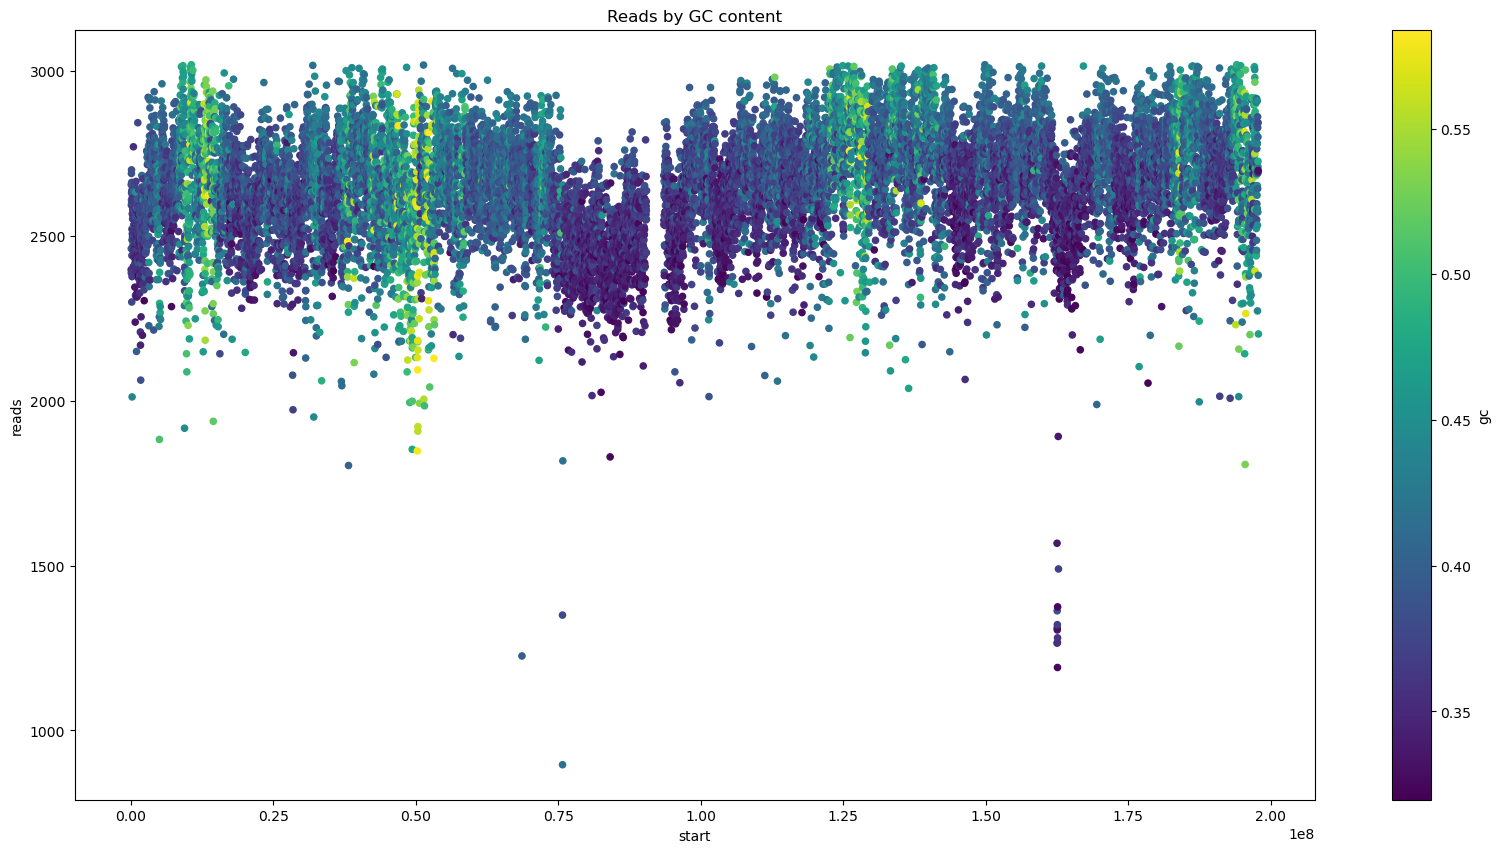

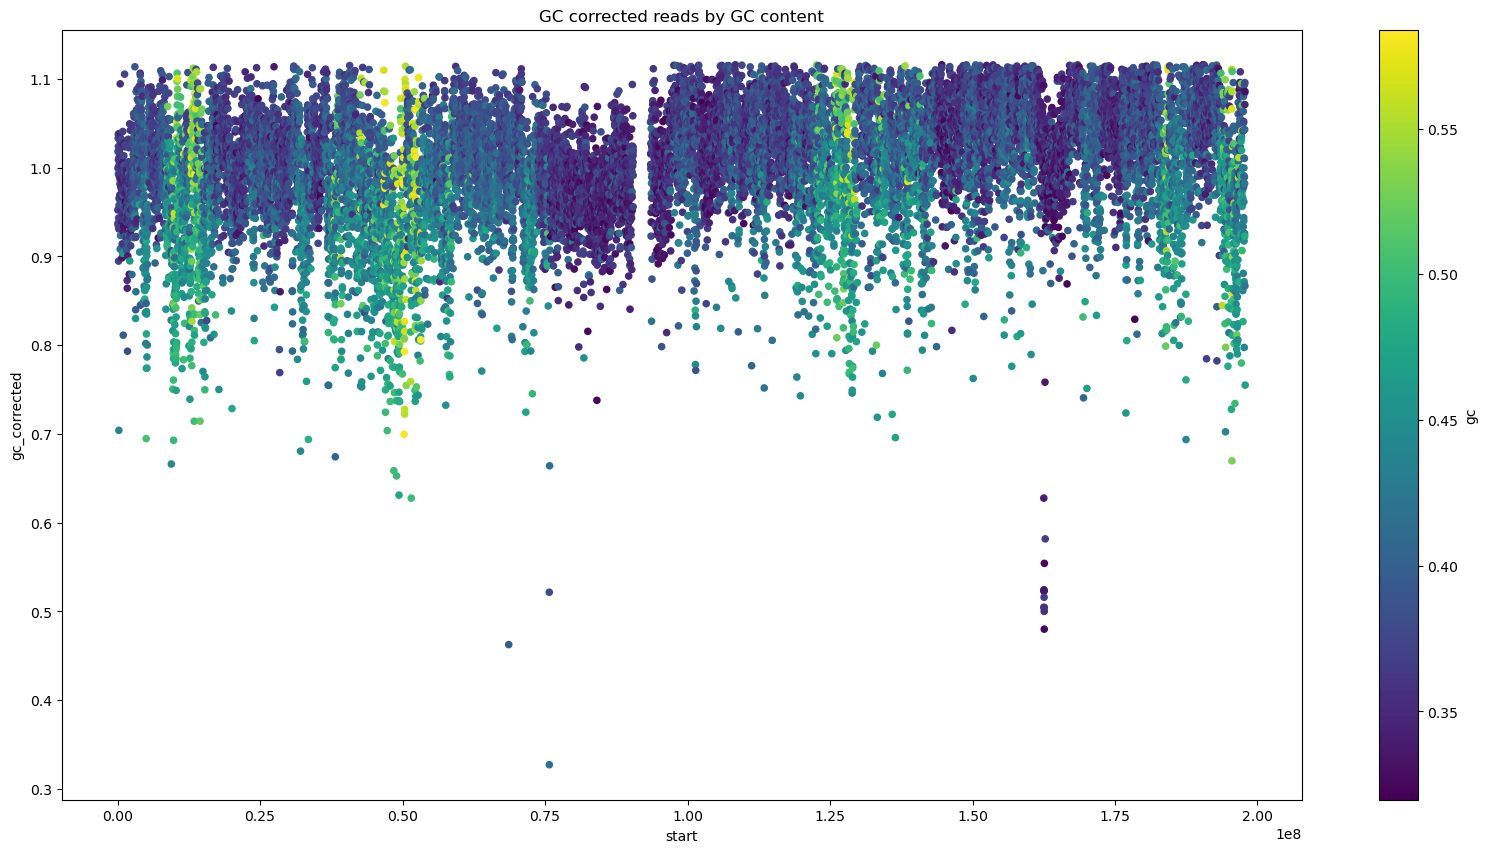

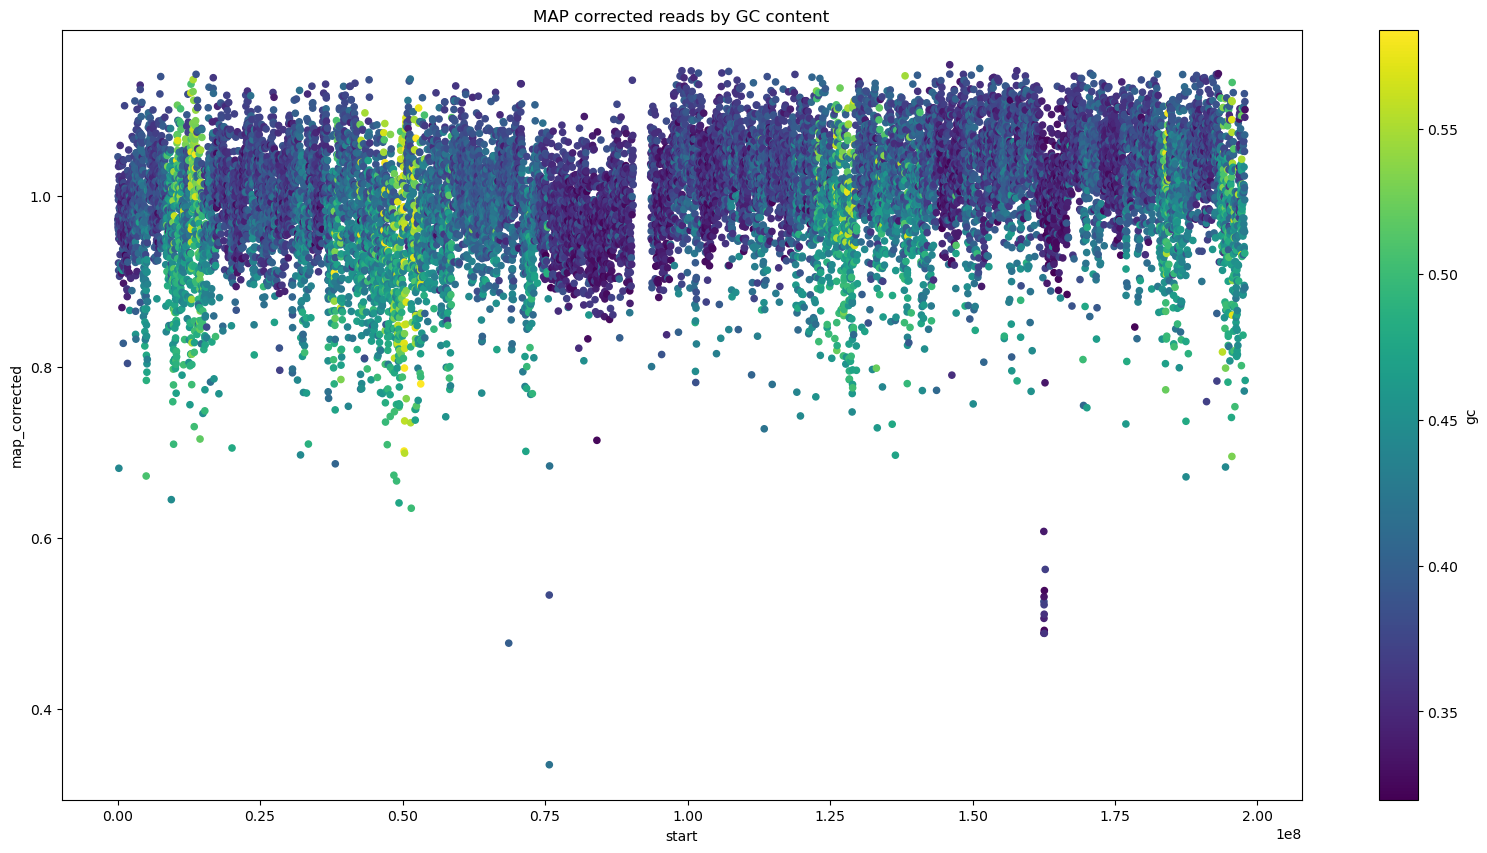

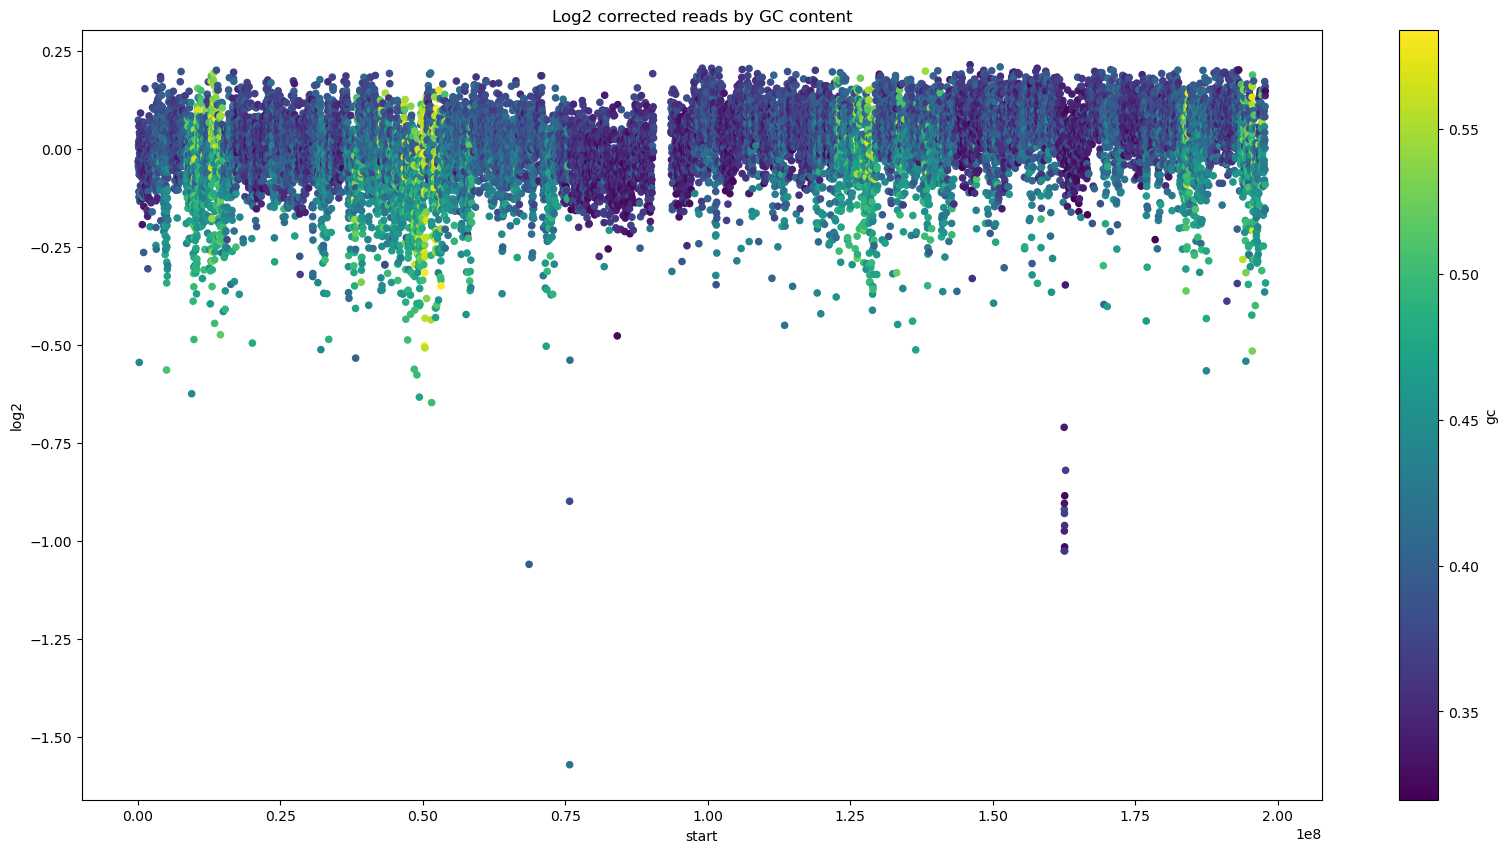

In [3]:
regions[regions['chrom'] == '3'].plot.scatter(x='start', y='reads', c='gc', colormap='viridis', figsize=(20,10), title='Reads by GC content')
regions[regions['chrom'] == '3'].plot.scatter(x='start', y='gc_corrected', c='gc', colormap='viridis', figsize=(20,10), title='GC corrected reads by GC content')
regions[regions['chrom'] == '3'].plot.scatter(x='start', y='map_corrected', c='gc', colormap='viridis', figsize=(20,10), title='MAP corrected reads by GC content')
regions[regions['chrom'] == '3'].plot.scatter(x='start', y='log2', c='gc', colormap='viridis', figsize=(20,10), title='Log2 corrected reads by GC content')